# Запуск A/B - тестирования для интернет магазина

### <font color=red> Краткий план работ:

    
Шаг 1. Приоритизировать гипотезы с применение фреймворков
    
Шаг 2. Провести анализ A/B тестирования и ответить на следующие вопросы:

    a)Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
    
    b)Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
    
    c)Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
    
    d)Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
    
    e)Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
    
    f)Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
    
    g)Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
    
    h)Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
    
    i)Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
    
    j)Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
    
    k)Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
    
    l)Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
    
    m)Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
    
    n)Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.



________________________________________________

## Подготовка данных

Импортируем необходимые библиотеки 

Задаем имена таблицам

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy import stats as st
import datetime as dt
import scipy.stats as stats

hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv', sep=',')
visitors = pd.read_csv('/datasets/visitors.csv', sep=',')

Проверим корректность данных в таблице с гипотезами

In [2]:
display(hypothesis.info())
display(hypothesis.describe())
display(hypothesis.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


Проверим корректность данных в таблице с продажами

In [3]:
display(orders.info())
display(orders.describe())
display(orders.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Проверим корректность данных в таблице с пользователями

In [4]:
display(orders.info())
display(orders.describe())
display(orders.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Проверка на пропуски

In [5]:
print(hypothesis.isnull().sum())
print(orders.isnull().sum())
print(visitors.isnull().sum())

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64
transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
date        0
group       0
visitors    0
dtype: int64


Проверим на дубликаты

In [6]:
print(hypothesis.duplicated().sum())
print(orders.duplicated().sum())
print(visitors.duplicated().sum())

0
0
0


Приведем название столбцов в таблицах к нижнему регистру

In [7]:
hypothesis.columns = hypothesis.columns.str.lower()
orders.columns = orders.columns.str.lower()
visitors.columns = visitors.columns.str.lower()

### Вывод

Выгрузили датасеты.

Проверили на пропуски значений и дубликаты.

Ничего выше упомянутого не обнаружено.

## Часть 1. Приоритизация гипотез.

Применим фреймворк ICE для приоритизации гипотез и отсортируем по убыванию приоритета

In [8]:
hypothesis['ice'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis.sort_values(by='ice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000


Применим фреймворк RICE для приоритизации гипотез и отсортируем по убыванию приоритета

In [9]:
hypothesis['rice'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis.sort_values(by='rice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


### Вывод

Проверив два фреймворка мы обнаружили, что они показывают совершенно разную приоритизацию. То что у ICE было на первом месте, RICE поставило на четвертый.

Данный разрыв не удивителене и совершенно логичен, RICE берет величину, которая в ICE не учитывается - а именно охват(reach).

Мы возьмем данные из фреймворка в котором больше переменных.

Из этого следует, чтр первые четыре гипотезы по фреймворку RICE будут считаться основными.

## Часть 2. Анализ A/B-теста

### Построим график кумулятивной выручки по группам, сделаем выводы и предположения.

создадим массив уникальных дат

In [10]:
datesGroups = orders[['date','group']].drop_duplicates()

Агрегируем значения в таблицах.

Для orders найдём число уникальных ID заказов и пользователей, посчитаем сумму чеков

Для visitors данные по дням о посетителях

In [11]:
ordersAggregated = datesGroups.apply(
lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionid' : pd.Series.nunique,
'visitorid' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(
lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

Объединим кумулятивные данные в одну таблицу 

Присвоим новые имена названиям столбцов

In [12]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

Разделим на группы

In [13]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

In [14]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

Построим график выручки

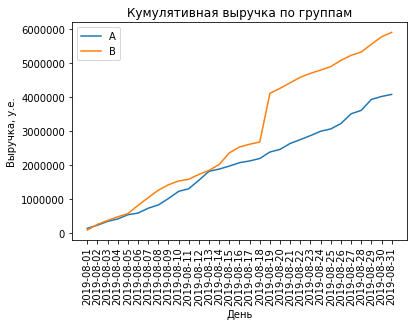

In [15]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xticks(rotation=90) 
plt.title('Кумулятивная выручка по группам')
plt.xlabel('День')
plt.ylabel('Выручка, y.e.')
plt.legend()

### Вывод

Взглянув на график мы можем пронаблюдать, что в середине месяца у группы B случился резкий всплеск по выручке, хотя до этого момента обе группы были в приблизительно равных позициях.

Выдвинем гипотезу, что данный всплеск связан с увеличением кол-ва заказов.

### Построим график кумулятивного среднего чека по группам, сделаем выводы и предположения

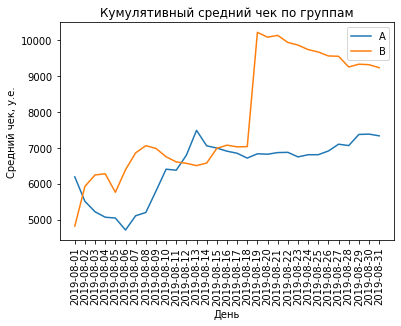

In [16]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation=90) 
plt.title('Кумулятивный средний чек по группам')
plt.xlabel('День')
plt.ylabel('Средний чек, y.e.')
plt.legend()

### Вывод

На графике мы видим продолжение тенценции по увеличению выручки в тестовой группе B, с 18.08 средний чек так же стал сильно увеличиваться.

Гипотеза об увеличении кол-ва закзов продолжает действовать, так же не будем исключать аномальные данные которые мы позже проверим.

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A, сделаем выводы и предположения.

Соберем данные в одну таблицу

In [17]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

Строим график отношения средних  чеков

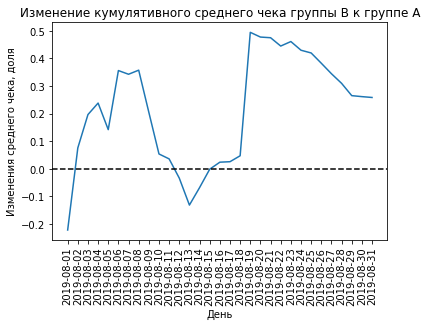

In [18]:
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.xticks(rotation=90) 
plt.title('Изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel('День')
plt.ylabel('Изменения среднего чека, доля')
plt.axhline(y=0, color='black', linestyle='--')

### Вывод

Аналогичная ситуация что и с графиками выше, аномальный рост кумулятивного среднего чека группы B к группе A, сильно меняется с 18.08

У группы В был резкий всплеск, после чего спад и снова всплеск.

Предполагаю, что данные такие, по двум причинам: 1) Аномальные заказы (с очень большими суммами); 2) Увеличение числа заказов.

### Построим график кумулятивной конверсии по группам, сделаем выводы и предположения.

Считаем кумулятивную конверсию

In [19]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

Разделим по группам

In [20]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

Построим график

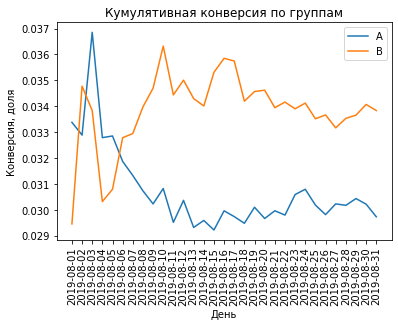

In [21]:
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xticks(rotation=90) 
plt.title('Кумулятивная конверсия по группам')
plt.xlabel('День')
plt.ylabel('Конверсия, доля')
plt.legend();

### Вывод

Из графика выше мы можем увидеть, что кумулятивная конверсия группы B начала свой рост в начале месяца, что сходится со стартом проведения теста.

График выше подтверждает нашу гипотезу об увеличении числа заказов в группе В с самого начала месяца.

Предположу, что увеличилось не кол-во постетителей и покупателей, а % покупающих пользователей.


### Построим график относительного изменения кумулятивной конверсии группы B к группе A, сделаем выводы и предположения.

Объединим таблицы

In [22]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

Построим график

No handles with labels found to put in legend.


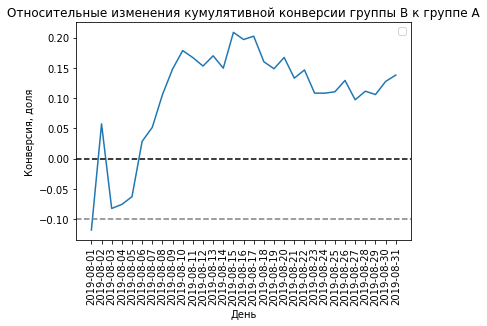

In [23]:
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.xticks(rotation=90) 
plt.title('Относительные изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('День')
plt.ylabel('Конверсия, доля')
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')

### Вывод

На графике относительных изменений мы так же можем пронаблюдать, что изменения начались в начале месяца, тогда как выручка выросла к середине.

С начала месяца конверсия группы В выросла на 20% к группе А.

Есть различия между подобным графиком по выручке, предполагаю что в первой половине месяца заказов делалось больше, но на маеньшую сумму, поэтому график был относительно ровным.

### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

Сгруппируем таблицу orders

In [24]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsers.columns = ['user','orders']

Построим график

Text(0, 0.5, 'Количество заказов')

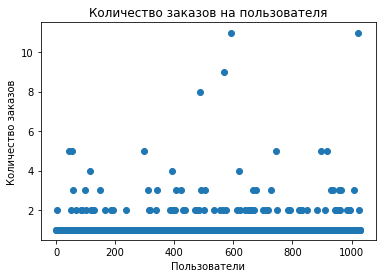

In [25]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Количество заказов на пользователя')
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')

### Вывод

В среднем пользователи заказывают от 1 до 3 раз.

Необходимо проверить заказы которые выбиваются из этих значений

Выдвину гипотезу, что выбивающиеся заказы попадают в группу В и поэтому она так сильно вырывается вперед.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя, выберем границу для определения аномальных пользователей.

Найдем перцентили

In [26]:
np.percentile(ordersByUsers['orders'],[95, 99])

array([2., 4.])

### Вывод

Не более 5% пользователей делают больше двух заказов и не более 1% пользователей делают больше четырех заказов, что является нормой.

Будем считать аномалиями кол-во заказов больше двух.

Эти данные подтверждают гипотезу выше, об аномальном кол-ве заказов на пользователя. Теперь првоерим стоимость заказов.

### Построим точечный график стоимостей заказов, сделаем выводы и предположения.

Text(0, 0.5, 'Стоимость заказов')

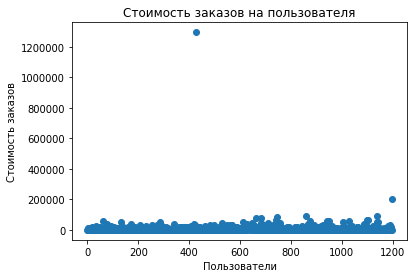

In [27]:
x_values_2 = pd.Series(range(0,len(orders)))

plt.scatter(x_values_2, orders['revenue'])
plt.title('Стоимость заказов на пользователя')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов')

### Вывод

В среднем пользователи делают заказ на сумму меньше 50 000.

Кол-во заказазов с высокой стоимостью достаточно много, гипотеза об аномалиях работает.

Необходимо проверить перцентил.

### Посчитаем 95-й и 99-й перцентили стоимости заказов, выберем границу для определения аномальных заказов

In [28]:
np.percentile(orders['revenue'],[95, 99])

array([28000. , 58233.2])

### Вывод

Не более 5% пользователей делают покупки больше чем на 28 000, и не более 1% пользователей делают заказы не больше, чем на 58 233, что является нормой.

Будем считать аномалиями стоимость заказов от 28 000.

### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным, сделаем выводы и предположения.

Сформулируем нулевую гипотезу: Конверсии по "сырым" данным между группами А и В равны.

Сформулируем альтернативную гипотезу: Конверсии по "сырым" данным между группами А и В не равны.

Сгруппируем таблицу visits по дням и группам, найдем кумулятивные данные так же по группам

In [29]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

Проделаем аналогичную операцию с таблицой orders

In [30]:
ordersADaily = orders[orders['group']=='A'][['date', 'transactionid', 'visitorid', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionid' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionid', 'visitorid', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionid' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

Сгруппируем все данные в одну таблицу

In [31]:
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

Создадим переменные новые переменные, в них укажем пользователей которые заказывали хотя бы раз.

In [32]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

Необходимо обозначить пользователей которые ничего не заказывали

In [33]:
pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')

0        0
1        0
2        0
3        0
4        0
        ..
18228    0
18229    0
18230    0
18231    0
18232    0
Name: orders, Length: 18233, dtype: int64

Объединим последовательности через concat

In [34]:
[ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')]

[0      1
 1      1
 2      1
 3      1
 4      1
       ..
 498    1
 499    7
 500    1
 501    1
 502    1
 Name: orders, Length: 503, dtype: int64,
 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 18228    0
 18229    0
 18230    0
 18231    0
 18232    0
 Name: orders, Length: 18233, dtype: int64]

Объединим таблицы по строкам

In [35]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

Выведем результат применив статистический критерий Манна-Уитни

In [36]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.008
0.138


### Вывод

p-value меньше 0,05, из этого следует, что нулевую гипотезу мы отвергаем и "сырые" данные в конверсии между группами А и В не равны.

Второе число показывает что относительный прирост конверсии группы B к группе А составляет 13%, что подтверждает альтернативную гипотезу.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным, сделаем выводы и предположения.

Сформулируем нулевую гипотезу: Средний чек по "сырым" данным между группами А и В равны.

Сформулируем альтернативную гипотезу: Средний чек по "сырым" данным между группами А и В не равны.

Выведем данные по среднему чеку применив статистический критерий Манна-Уитни


In [37]:
print("{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.365
0.259


### Вывод


p-value Больше 0,05, соответственно это подтверждает нулевую гипотезу что средний чек между группами А и В по "сырым" данным  равен друг другу.

Но относительное различие среднего чека между сегментами составляет 25%, что достаточно много, чтобы усомниться в данной гипотезе.

Необходимо очистить данные от аномалий и сделать новую проверку гипотез.

### Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным, сделаем выводы и предположения.

Сформулируем нулевую гипотезу: Конверсии по "очщенным" данным между группами А и В равны.

Сформулируем альтернативную гипотезу: Конверсии по "очщенным" данным между группами А и В не равны.

Найдем аномалии.
За аномалии примем пользователей кто сделал больше трех заказов и на сумму более 28 000.

Объединим их в таблицу


In [38]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorid']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape)

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
(74,)


74 аномальных значения

Посчитаем статистическую значимость различий в конверсии между группами

Подготовим выборки количества заказов по пользователям и по группам

In [39]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

Применим критерий Манна-Уитни к выборкам

In [40]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.007
0.173


### Вывод

Результаты почти не изменились, следовательно нулевую гипотезу конверсии между группами по "очищенным" данным отвергаем и принимаем тот факт, что что конверсии групп А и В не равны.

Относительный прирост конверсии же увеличился с 13 до 17 процентов, что так же подтверждает нашу альтернативную гипотезу.

Конверсия группы В значительно привосходит тот же показатель группы А, даже с учетом исключения аномалий. Соответственно на данном этапе можно сделать вывод, что количество посетителей и покупателей на сайте группы В выросло.

Проверим изменился ли средний чек после очистки данных

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным, сделаем выводы и предположения.

Сформулируем нулевую гипотезу: Средний чек по "очищенным" данным между группами А и В равны.

Сформулируем альтернативную гипотезу: Средний чек по "Очищенным" данным между группами А и В не равны.

In [41]:
print("{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.369
-0.020


### Вывод

p-value увеличился, следовательно нулевая гипотеза подтверждается и средний чек между группами А и В по "очищенным" данным равны друг другу. 

Но разница между сегментами сократилась с 25% к группе В до 2% к группе А, это подтверждает нулевую гипотезу, что средний чек находится на одном уровне у обеих групп.

В данном случае мы увидели, как сильно аномалии могут повлиять на результаты тестов. Соотстветственно средний чек у пользователей одинаковый, покупать на большие суммы пользователи не стали, но найдя конверсию мы смогли сделать вывод, что покупать в группе В стали значительно чаще.

## Примем решение по результату теста и объясним его.

Что мы знаем:

1. Мы узнали, что конверсии группы А и В по "сырым" и "очищенным" данным не равны друг другу и отвергли нулевую гипотезу.

2. Так же выяснили, что средний чек группы А и В по "сырым" и "очищенным" данным равны друг другу и подтвердили нулевую гипотезу.

3. Выявили аномалии в данных по среднем чеку у групп, устраинили их и смогли подвердить наши гипотезы.

4. График различия конверсий между группами показал, что результаты тестовой группы В значительно превосходят группу А, день ото дня.

5. График различия среднего чека между группами показал, что результаты тестовой группы В значительно превосходят группу А, в середины месяца он значительно вырос, но после очистки данных от аномалий, мы подтвердили гипотезу что различия минимальны.

Вывод:

Тест можно остановить и признать успешным, тк группа В показала полное преводсходство по кол-ву заказов и в дальнейшем изменение статистики в пользу группы А равно 0.